#  <center>Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines</center>
## <center>A [DrivenData](https://www.drivendata.org/) Challenge </center>

## <center>Introduction</center>

## 0.0 Loading Our Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LogisticRegression





from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
data_dir = 'datasets/'

train_features = pd.read_csv(data_dir+'training_set_features.csv',index_col='respondent_id')
train_labels   = pd.read_csv(data_dir+'training_set_labels.csv',index_col='respondent_id')
test_features  = pd.read_csv(data_dir+'test_set_features.csv', index_col='respondent_id')

In [3]:
train_features.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
train_labels.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
null_threshold = 0.15

null_rate = train_features.isnull().sum(axis=0) / len(train_features)
null_bool = null_rate > null_threshold
null_cols = list(null_bool[null_bool == True].index)



In [6]:
null_cols

['health_insurance',
 'income_poverty',
 'employment_industry',
 'employment_occupation']

In [7]:
# Get rid of columns with too many null values
train_features.drop(null_cols,
                    axis=1,
                    inplace=True)
test_features.drop(null_cols,
                   axis=1,
                   inplace=True)



In [8]:
numeric_cols = train_features.select_dtypes(include=np.number)
non_numeric_cols =  train_features.select_dtypes(exclude=np.number)

numeric_cols.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [9]:
numeric_cols.isnull().values.any()

True

In [10]:
# Handle NaNs 
numeric_cols = numeric_cols.fillna(numeric_cols.median())

In [11]:
numeric_cols.isnull().values.any()

False

In [12]:
list(numeric_cols.columns)

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [13]:
numeric_cols.shape[0] == train_labels.shape[0]

True

In [14]:
train = numeric_cols.merge(train_labels, on='respondent_id')



num_correlations = train.corr()
num_correlations.sort_values('h1n1_vaccine',ascending=False)['h1n1_vaccine']


h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.394086
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.320580
opinion_h1n1_vacc_effective    0.267352
opinion_seas_risk              0.255874
doctor_recc_seasonal           0.218976
opinion_seas_vacc_effective    0.177799
health_worker                  0.168056
h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
chronic_med_condition          0.094360
opinion_h1n1_sick_from_vacc    0.074580
behavioral_wash_hands          0.074570
behavioral_touch_face          0.070855
behavioral_face_mask           0.070413
child_under_6_months           0.066712
behavioral_avoidance           0.046837
behavioral_antiviral_meds      0.040226
behavioral_outside_home        0.022080
behavioral_large_gatherings    0.018089
opinion_seas_sick_from_vacc    0.008415
household_adults               0.007323
household_children            -0.002567
Name: h1n1_vaccine, dtype: float64

In [15]:
num_correlations.sort_values('seasonal_vaccine',ascending=False)['seasonal_vaccine']

seasonal_vaccine               1.000000
opinion_seas_risk              0.386916
h1n1_vaccine                   0.377143
doctor_recc_seasonal           0.360696
opinion_seas_vacc_effective    0.358869
opinion_h1n1_risk              0.215650
opinion_h1n1_vacc_effective    0.203187
doctor_recc_h1n1               0.198560
chronic_med_condition          0.169465
h1n1_concern                   0.154488
health_worker                  0.126977
behavioral_touch_face          0.119925
h1n1_knowledge                 0.119779
behavioral_wash_hands          0.112254
behavioral_avoidance           0.076130
behavioral_large_gatherings    0.063722
behavioral_outside_home        0.053287
behavioral_face_mask           0.050020
opinion_h1n1_sick_from_vacc    0.027964
child_under_6_months           0.013424
behavioral_antiviral_meds      0.006013
opinion_seas_sick_from_vacc   -0.060538
household_adults              -0.065137
household_children            -0.111680
Name: seasonal_vaccine, dtype: float64

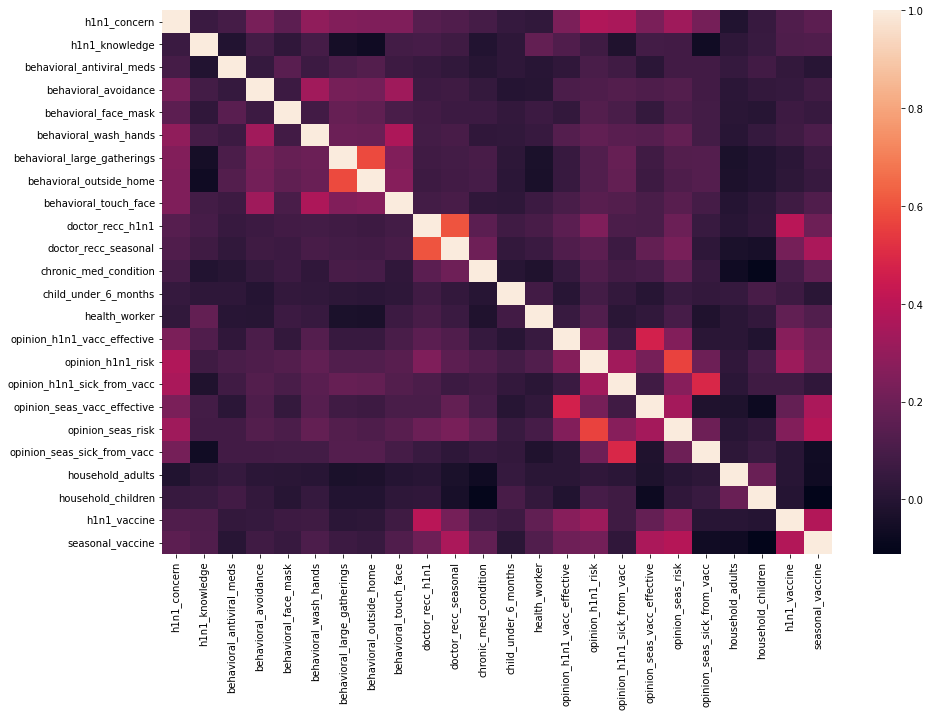

In [16]:
plt.figure(figsize=(15, 10))
h1n1_heat = sns.heatmap(num_correlations)

In [17]:
non_numeric_cols

,age_group,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City"


In [18]:
non_numeric_cols = non_numeric_cols.apply(LabelEncoder().fit_transform)

In [19]:
non_num_corr = non_numeric_cols.corr()

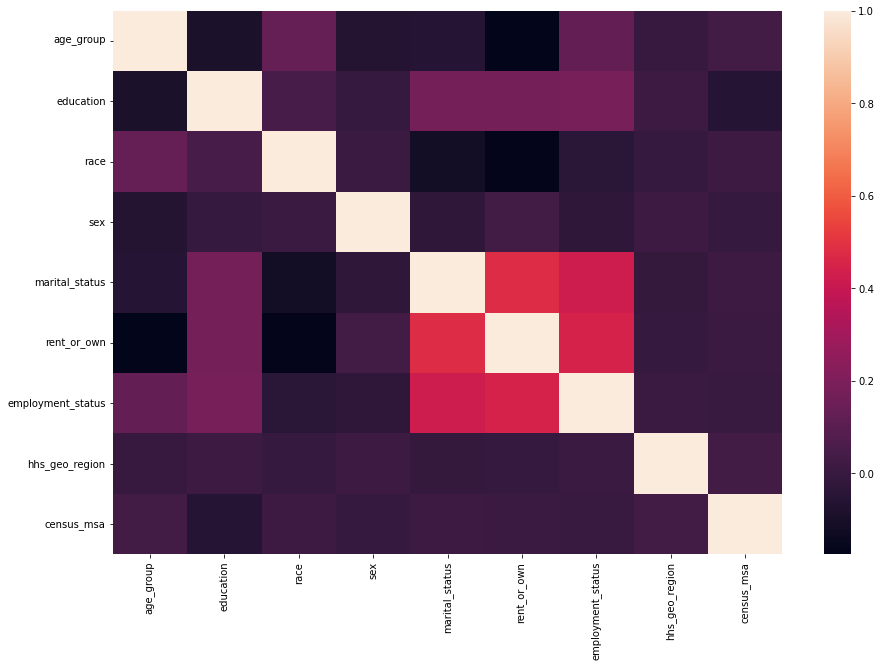

In [20]:
plt.figure(figsize=(15, 10))
h1n1_heat = sns.heatmap(non_num_corr)

In [21]:
train_features = numeric_cols.merge(non_numeric_cols,left_index=True,right_index=True)

In [22]:
train = train_features.merge(train_labels, on='respondent_id')

In [23]:
corr = train.corr()

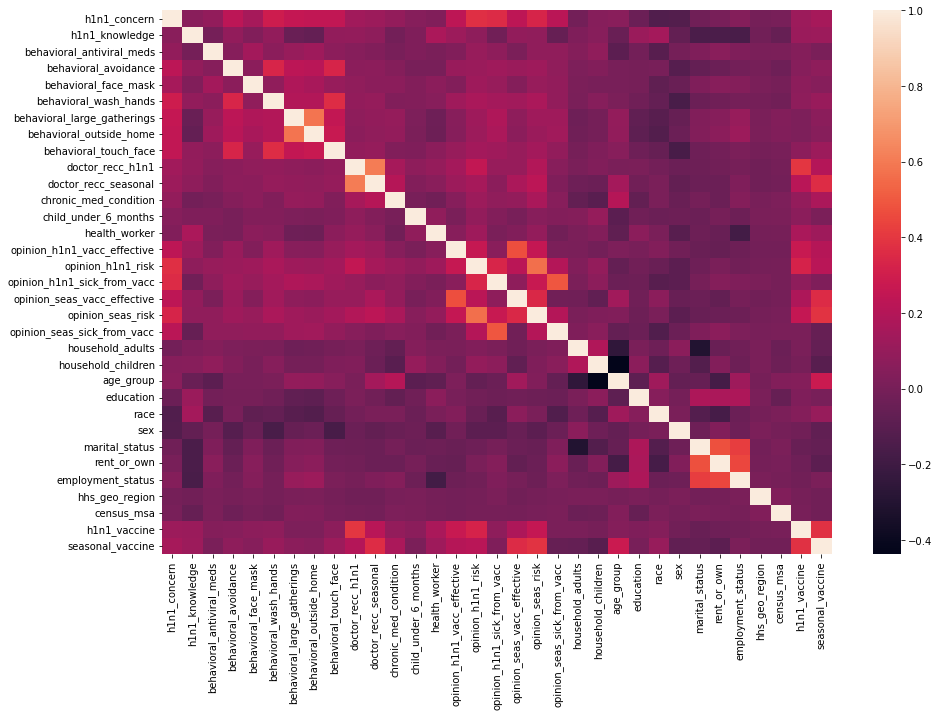

In [24]:
plt.figure(figsize=(15, 10))
corr_heat = sns.heatmap(corr)

In [25]:
corr.sort_values('h1n1_vaccine',ascending=False)['h1n1_vaccine']


h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.394086
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.320580
opinion_h1n1_vacc_effective    0.267352
opinion_seas_risk              0.255874
doctor_recc_seasonal           0.218976
opinion_seas_vacc_effective    0.177799
health_worker                  0.168056
h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
chronic_med_condition          0.094360
opinion_h1n1_sick_from_vacc    0.074580
behavioral_wash_hands          0.074570
behavioral_touch_face          0.070855
behavioral_face_mask           0.070413
child_under_6_months           0.066712
behavioral_avoidance           0.046837
age_group                      0.041074
race                           0.041061
behavioral_antiviral_meds      0.040226
education                      0.024694
behavioral_outside_home        0.022080
behavioral_large_gatherings    0.018089
opinion_seas_sick_from_vacc    0.008415


In [26]:
top_seasonal = (corr.sort_values('seasonal_vaccine',ascending=False)
            .drop(['h1n1_vaccine','seasonal_vaccine'],
                  axis=0)['seasonal_vaccine'])

In [27]:
top_h1n1 = (corr.sort_values('h1n1_vaccine',ascending=False)
            .drop(['h1n1_vaccine','seasonal_vaccine'],
                  axis=0)['h1n1_vaccine'])

In [28]:
np.abs(top_seasonal)

opinion_seas_risk              0.386916
doctor_recc_seasonal           0.360696
opinion_seas_vacc_effective    0.358869
age_group                      0.277454
opinion_h1n1_risk              0.215650
opinion_h1n1_vacc_effective    0.203187
doctor_recc_h1n1               0.198560
chronic_med_condition          0.169465
h1n1_concern                   0.154488
health_worker                  0.126977
behavioral_touch_face          0.119925
h1n1_knowledge                 0.119779
behavioral_wash_hands          0.112254
race                           0.101743
behavioral_avoidance           0.076130
behavioral_large_gatherings    0.063722
behavioral_outside_home        0.053287
behavioral_face_mask           0.050020
opinion_h1n1_sick_from_vacc    0.027964
child_under_6_months           0.013424
employment_status              0.011684
behavioral_antiviral_meds      0.006013
education                      0.002024
census_msa                     0.018275
hhs_geo_region                 0.018482


In [29]:
top_seasonal = list(top_seasonal.index)[:5]
top_seasonal

['opinion_seas_risk',
 'doctor_recc_seasonal',
 'opinion_seas_vacc_effective',
 'age_group',
 'opinion_h1n1_risk']

In [30]:
top_h1n1 = list(top_h1n1.index)[:5]

In [31]:
top_features = top_seasonal + top_h1n1

In [32]:
list( set(top_seasonal).union(set(top_h1n1)))

['age_group',
 'opinion_h1n1_vacc_effective',
 'opinion_seas_vacc_effective',
 'doctor_recc_h1n1',
 'opinion_h1n1_risk',
 'doctor_recc_seasonal',
 'opinion_seas_risk']

In [33]:
test = []
for i in range(5):
    numeric_preprocessing_steps = Pipeline([ 
                                            ('standard_scaler', StandardScaler())
                                            ])


    estimators = MultiOutputClassifier(
        estimator=LogisticRegression(penalty="none", C=1)
    )
    full_pipeline = Pipeline([
        ("numeric", numeric_preprocessing_steps),
        ("estimators", estimators)])
    X_train, X_eval, y_train, y_eval = train_test_split(
#         train[top_features],
        train_features,
        train_labels,
        test_size=0.2,
        shuffle=True,
        stratify=train_labels,
    )



    full_pipeline.fit(X_train, y_train)
    preds = full_pipeline.predict_proba(X_eval)



    y_preds = pd.DataFrame(
        {
            "h1n1_vaccine": preds[0][:,1],
            "seasonal_vaccine": preds[1][:,1],

        },
        index= y_eval.index
    )
    score = roc_auc_score(y_eval, y_preds)
    test.append(score)
np.mean(test)

0.8370963807781622

In [34]:
maybe = train_features.drop(['marital_status'],axis=1)
test = []
for i in range(100):
    numeric_preprocessing_steps = Pipeline([ 
                                            ('standard_scaler', StandardScaler())
                                            ])


    estimators = MultiOutputClassifier(
        estimator=LogisticRegression(penalty="none", C=1)
    )
    full_pipeline = Pipeline([
        ("numeric", numeric_preprocessing_steps),
        ("estimators", estimators)])
    X_train, X_eval, y_train, y_eval = train_test_split(
#         train[top_features],
        maybe,
        train_labels,
        test_size=0.33,
        shuffle=True,
        stratify=train_labels,
    )



    full_pipeline.fit(X_train, y_train)
    preds = full_pipeline.predict_proba(X_eval)



    y_preds = pd.DataFrame(
        {
            "h1n1_vaccine": preds[0][:,1],
            "seasonal_vaccine": preds[1][:,1],

        },
        index= y_eval.index
    )
    score = roc_auc_score(y_eval, y_preds)
    test.append(score)
np.mean(test)

0.8368187744167227

In [35]:
# def make_features(df):
#     col_names = []
#     new_cols = []
#     for col1 in df:
#         for col2 in df:
#             col_names.append(str(col1)+'+'+str(col2))
#             new_cols.append(df[col1] + df[col2])
#     for i, col in enumerate(col_names):
#         df[col] = new_cols[i]
#     return df
# make_features(top_features)
maybe

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,household_adults,household_children,age_group,education,race,sex,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3,1,3,0,0,1,8,2
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1,0,3,1,1,0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,2,3,1,0,0,9,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4,0,3,0,1,1,5,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,2,3,3,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4,3,3,0,0,1,9,2
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0,2,3,1,1,0,6,1
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3,3,3,0,0,3,6,0


In [36]:
train_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,household_children,age_group,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3,1,3,0,1,0,1,8,2
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1,0,3,1,1,1,0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,2,3,1,1,0,0,9,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,4,0,3,0,1,1,1,5,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,2,3,3,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4,3,3,0,1,0,1,9,2
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0,2,3,1,1,1,0,6,1
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,3,3,3,0,1,0,3,6,0


In [37]:
def helper(num):
    num = num + 5
    num = np.exp(num)
    return num

# new here

In [38]:
def make_features(new_features):
#     new_features = new_features.apply(np.exp).drop(['marital_status'],axis= 1)
    new_features = new_features.apply(np.log10)
    new_features['1'] = new_features['doctor_recc_h1n1'] * new_features['opinion_seas_vacc_effective']
    new_features['2'] = np.power(new_features['doctor_recc_h1n1'] , new_features['opinion_h1n1_vacc_effective'])

    new_features['3'] = 6 * new_features['opinion_h1n1_vacc_effective'] + 10* new_features['opinion_h1n1_risk']
    new_features['4'] = new_features['age_group'] +  new_features['opinion_h1n1_vacc_effective']
    new_features['5'] = new_features['chronic_med_condition'] / np.exp(new_features['opinion_seas_vacc_effective'])
    new_features['6'] = new_features['1']  * new_features['3']
    new_features['11'] = new_features['1']  / new_features['3']
    new_features['6'] = new_features['opinion_seas_sick_from_vacc']   * new_features['3']
#     new_features['12'] = ((new_features['chronic_med_condition'] * (new_features['behavioral_face_mask'])) * 
#                           new_features['opinion_seas_vacc_effective'])
#     new_features['7'] = new_features['doctor_recc_h1n1'] + 5 * new_features['opinion_seas_vacc_effective']
#     new_features['8'] = new_features['doctor_recc_h1n1'] + 5 * new_features['opinion_seas_vacc_effective']
#     new_features['9'] = new_features['doctor_recc_h1n1'] + 5 * new_features['opinion_seas_vacc_effective']
    return new_features
new_features = make_features(train)

In [39]:
new_corr = new_features.corr()
list(new_features.columns)

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group',
 'education',
 'race',
 'sex',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'h1n1_vaccine',
 'seasonal_vaccine',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '11']

In [40]:
new_corr

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa,h1n1_vaccine,seasonal_vaccine,1,2,3,4,5,6,11
h1n1_concern,1.000000,0.060838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006068,NaN,NaN,NaN,-0.138909,0.326039,0.089555,NaN,0.267516,NaN
h1n1_knowledge,0.060838,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.034689,NaN,NaN,NaN,-0.032359,0.078927,-0.009085,NaN,-0.049173,NaN
behavioral_antiviral_meds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
behavioral_avoidance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
behavioral_face_mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
behavioral_wash_hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
behavioral_large_gatherings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
behavioral_outside_home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
behavioral_touch_face,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doctor_recc_h1n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


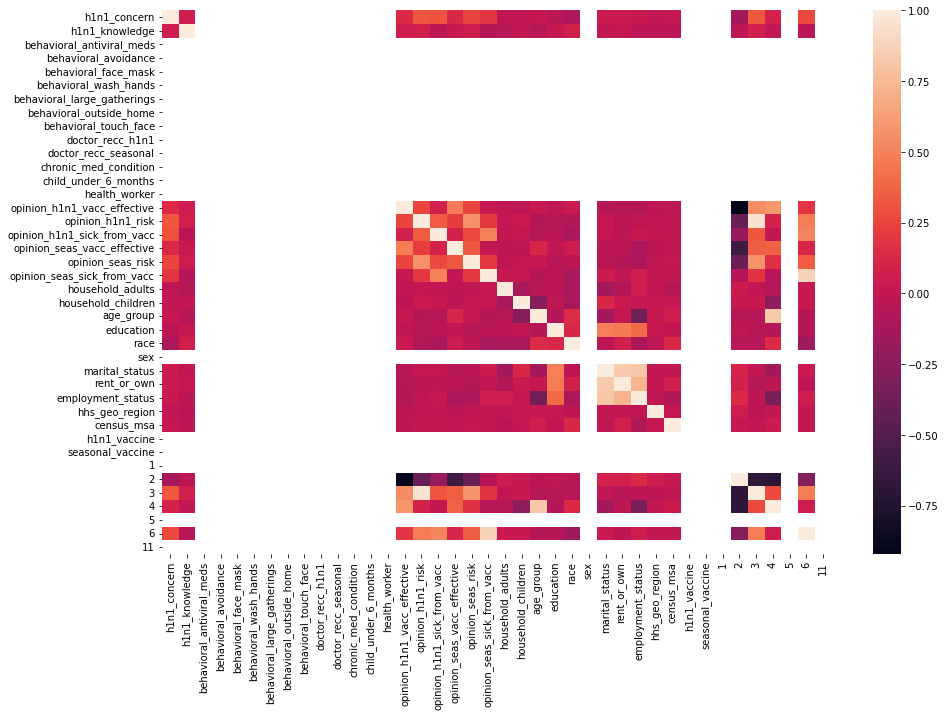

In [41]:
plt.figure(figsize=(15, 10))
new_corr_heat = sns.heatmap(new_corr)

In [42]:
top_seasonal = (new_corr.sort_values('seasonal_vaccine',ascending=False)
            .drop(['h1n1_vaccine','seasonal_vaccine'],
                  axis=0)['seasonal_vaccine'])
top_seasonal

h1n1_concern                  NaN
h1n1_knowledge                NaN
behavioral_antiviral_meds     NaN
behavioral_avoidance          NaN
behavioral_face_mask          NaN
behavioral_wash_hands         NaN
behavioral_large_gatherings   NaN
behavioral_outside_home       NaN
behavioral_touch_face         NaN
doctor_recc_h1n1              NaN
doctor_recc_seasonal          NaN
chronic_med_condition         NaN
child_under_6_months          NaN
health_worker                 NaN
opinion_h1n1_vacc_effective   NaN
opinion_h1n1_risk             NaN
opinion_h1n1_sick_from_vacc   NaN
opinion_seas_vacc_effective   NaN
opinion_seas_risk             NaN
opinion_seas_sick_from_vacc   NaN
household_adults              NaN
household_children            NaN
age_group                     NaN
education                     NaN
race                          NaN
sex                           NaN
marital_status                NaN
rent_or_own                   NaN
employment_status             NaN
hhs_geo_region

In [43]:
top_h1n1 = (new_corr.sort_values('h1n1_vaccine',ascending=False)
            .drop(['h1n1_vaccine','seasonal_vaccine'],
                  axis=0)['h1n1_vaccine'])
top_h1n1

h1n1_concern                  NaN
h1n1_knowledge                NaN
behavioral_antiviral_meds     NaN
behavioral_avoidance          NaN
behavioral_face_mask          NaN
behavioral_wash_hands         NaN
behavioral_large_gatherings   NaN
behavioral_outside_home       NaN
behavioral_touch_face         NaN
doctor_recc_h1n1              NaN
doctor_recc_seasonal          NaN
chronic_med_condition         NaN
child_under_6_months          NaN
health_worker                 NaN
opinion_h1n1_vacc_effective   NaN
opinion_h1n1_risk             NaN
opinion_h1n1_sick_from_vacc   NaN
opinion_seas_vacc_effective   NaN
opinion_seas_risk             NaN
opinion_seas_sick_from_vacc   NaN
household_adults              NaN
household_children            NaN
age_group                     NaN
education                     NaN
race                          NaN
sex                           NaN
marital_status                NaN
rent_or_own                   NaN
employment_status             NaN
hhs_geo_region

In [44]:
test = []
new_train = new_features.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)
for i in range(20):
    numeric_preprocessing_steps = Pipeline([ 
                                            ('standard_scaler', StandardScaler())
                                            ])


    estimators = MultiOutputClassifier(
        estimator=LogisticRegression(penalty="none", C=1)
    )
    full_pipeline = Pipeline([
        ("numeric", numeric_preprocessing_steps),
        ("estimators", estimators)])
    X_train, X_eval, y_train, y_eval = train_test_split(
#         train[top_features],
        new_train,
        train_labels,
        test_size=0.33,
        shuffle=True,
        stratify=train_labels,
    )



    full_pipeline.fit(X_train, y_train)
    preds = full_pipeline.predict_proba(X_eval)



    y_preds = pd.DataFrame(
        {
            "h1n1_vaccine": preds[0][:,1],
            "seasonal_vaccine": preds[1][:,1],

        },
        index= y_eval.index
    )
    score = roc_auc_score(y_eval, y_preds)
    test.append(score)
    
np.mean(test)

/home/ray/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
new_train = new_features.drop(['marital_status'],axis=1)
test = []
new_train = new_features.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)
for i in range(20):
    numeric_preprocessing_steps = Pipeline([ 
                                            ('standard_scaler', StandardScaler())
                                            ])


    estimators = MultiOutputClassifier(
        estimator=LogisticRegression(penalty="none", C=1)
    )
    full_pipeline = Pipeline([
        ("numeric", numeric_preprocessing_steps),
        ("estimators", estimators)])
    X_train, X_eval, y_train, y_eval = train_test_split(
#         train[top_features],
        new_train,
        train_labels,
        test_size=0.2,
        shuffle=True,
        stratify=train_labels,
    )



    full_pipeline.fit(X_train, y_train)
    preds = full_pipeline.predict_proba(X_eval)



    y_preds = pd.DataFrame(
        {
            "h1n1_vaccine": preds[0][:,1],
            "seasonal_vaccine": preds[1][:,1],

        },
        index= y_eval.index
    )
    score = roc_auc_score(y_eval, y_preds)
    test.append(score)
    
np.mean(test)

In [ ]:
def clean(train_features):
    null_threshold = 0.15

    null_rate = train_features.isnull().sum(axis=0) / len(train_features)
    null_bool = null_rate > null_threshold
    null_cols = list(null_bool[null_bool == True].index)
    # Get rid of columns with too many null values
    train_features.drop(null_cols,
                        axis=1,
                        inplace=True)

    numeric_cols = train_features.select_dtypes(include=np.number)
    non_numeric_cols =  train_features.select_dtypes(exclude=np.number)
    # Handle NaNs 
    numeric_cols = numeric_cols.fillna(numeric_cols.median())
    non_numeric_cols = non_numeric_cols.apply(LabelEncoder().fit_transform)
    train_features = numeric_cols.merge(non_numeric_cols,left_index=True,right_index=True)
    return train_features

In [ ]:
features_df = pd.read_csv(
    data_dir + "training_set_features.csv",
    index_col = "respondent_id"
    )
labels_df = pd.read_csv(
    data_dir + "training_set_labels.csv",
    index_col = "respondent_id"
)


test_features = pd.read_csv(data_dir+"test_set_features.csv",
                               index_col="respondent_id")

In [ ]:

test_features = clean(test_features)
features_df = clean(features_df)

test_features = make_features(test_features)
features_df = make_features(features_df)

In [ ]:
# Retrain Model on Full Dataset

full_pipeline.fit(features_df, labels_df)

None  # So we don't print out the whole pipeline representation





test_probas = full_pipeline.predict_proba(test_features)




submission_df = pd.read_csv(data_dir + "submission_format.csv",
                            index_col = "respondent_id")





# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features.index.values,
                              submission_df.index.values)


# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:,1]
submission_df["seasonal_vaccine"] = test_probas[1][:,1]
submission_df.to_csv('/home/ray/Documents/DrivenData/Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines/my_submission.csv',
                     index=True)

In [ ]:
opinion_seas_sick_from_vacc    0.008415
household_adults               0.007323
census_msa                     0.000420
household_children            -0.002567
hhs_geo_region                -0.003327